🧩 [1] 라이브러리 & 데이터 로드

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"  # 윈도우 한글 폰트
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("../output/seller_features.csv")

print("데이터 크기:", df.shape)
df.head()

데이터 크기: (403, 29)


,id,seller_id,company_name,representative_name,business_registration_number,business_address,email,phone,mail_order_number,satisfaction_score,...,negative_keyword_ratio,duplicate_review_ratio,review_count_y,total_question_count,refund_question_ratio,authenticity_question_ratio,defect_question_ratio,delivery_question_ratio,review_density,question_to_review_ratio
0,1952,A00050433,(주)다노트정보,박정훈,106-86-22951,"서울특별시 용산구 한강로3가 용산역민자역사 5층 164,165호",danote1@nate.com,02-719-6078,제 용산 01895호,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1953,A00869252,(주)비오비,오용환,592-81-02490,경기도 고양시 덕양구 행주로99번길 46-52 1층,bob220331@naver.com,010-4350-0335,2022-고양덕양구-2371,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954,NaN,(주)오제앤에스,윤돈영,854-87-02819,서울특별시 용산구 새창로 181 21-1033,ojeands@naver.com,02-706-2678,제2023-서울용산-1697호,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,A01068636,(주)이레푸드,이상진,723-86-03083,경상남도 양산시 북안남7길 4-10 505호,witness007@naver.com,055-362-1549,2023-경남양산-1207,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1956,A00269260,BOT,김성준,289-51-00546,서울특별시 송파구 충민로 152 304동 1203호,sanelvia@naver.com,010-2853-7146,제2020-서울송파-1240호,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🧾 [2] 컬럼 & 결측치 확인

In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            403 non-null    int64  
 1   seller_id                     312 non-null    str    
 2   company_name                  403 non-null    str    
 3   representative_name           403 non-null    str    
 4   business_registration_number  403 non-null    str    
 5   business_address              403 non-null    str    
 6   email                         403 non-null    str    
 7   phone                         403 non-null    str    
 8   mail_order_number             396 non-null    str    
 9   satisfaction_score            403 non-null    int64  
 10  review_count_x                403 non-null    int64  
 11  total_product_count           403 non-null    int64  
 12  is_abusing_seller             403 non-null    bool   
 13  created_at      

In [28]:
df.isnull().mean().sort_values(ascending=False).head(15)

refund_question_ratio          0.774194
question_to_review_ratio       0.774194
delivery_question_ratio        0.774194
authenticity_question_ratio    0.774194
defect_question_ratio          0.774194
total_question_count           0.774194
rating_std                     0.717122
vendor_name                    0.555831
review_count_y                 0.555831
negative_keyword_ratio         0.555831
avg_review_length              0.555831
duplicate_review_ratio         0.555831
low_rating_ratio               0.555831
review_density                 0.555831
avg_rating                     0.555831
dtype: float64

🎯 [3] 타겟 변수 분포 (악성 판매자)

In [29]:
df["is_abusing_seller"].value_counts(normalize=True)

is_abusing_seller
True     0.630273
False    0.369727
Name: proportion, dtype: float64

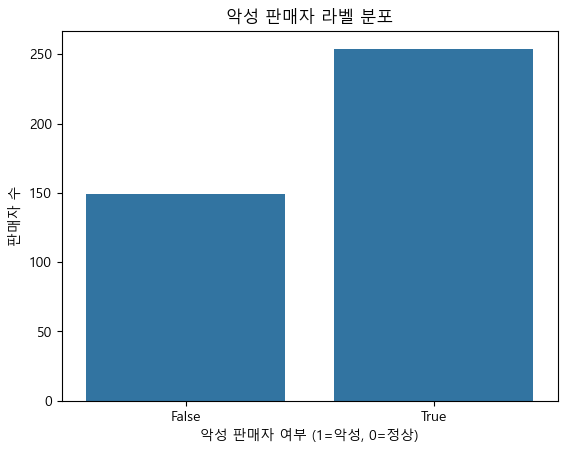

In [30]:
sns.countplot(x="is_abusing_seller", data=df)
plt.title("악성 판매자 라벨 분포")
plt.xlabel("악성 판매자 여부 (1=악성, 0=정상)")
plt.ylabel("판매자 수")
plt.show()

⭐ [4] 평점 Feature 분석

In [31]:
rating_cols = ["avg_rating", "rating_std", "low_rating_ratio"]
df[rating_cols].describe()

,avg_rating,rating_std,low_rating_ratio
count,179.000000,114.000000,179.000000
mean,3.741658,0.574653,0.119892
std,0.871972,0.594412,0.263869
min,1.000000,0.000000,0.000000
25%,3.550000,0.000000,0.000000
50%,4.000000,0.494680,0.000000
75%,4.000000,0.979904,0.047619
max,5.000000,2.121320,1.000000


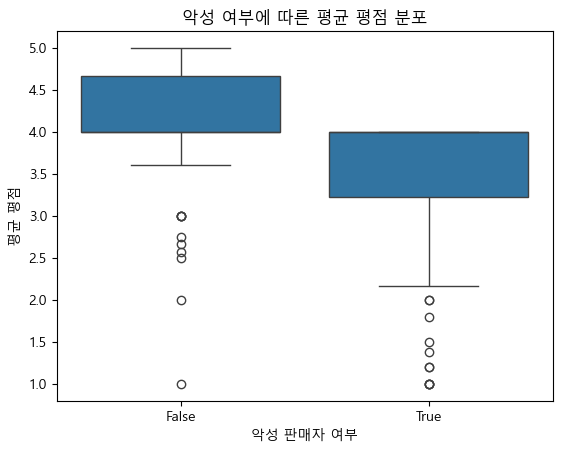

In [32]:
sns.boxplot(data=df, x="is_abusing_seller", y="avg_rating")
plt.title("악성 여부에 따른 평균 평점 분포")
plt.xlabel("악성 판매자 여부")
plt.ylabel("평균 평점")
plt.show()

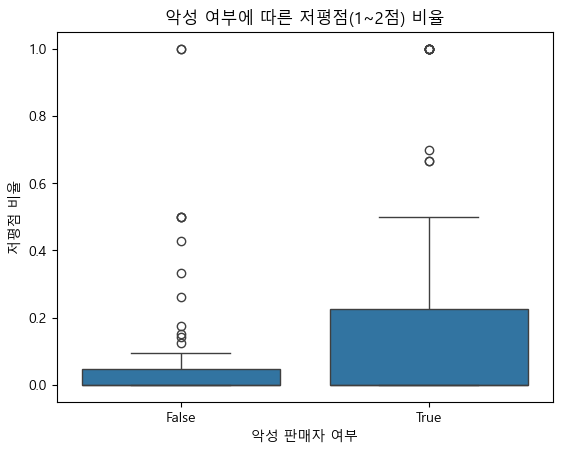

In [33]:
sns.boxplot(data=df, x="is_abusing_seller", y="low_rating_ratio")
plt.title("악성 여부에 따른 저평점(1~2점) 비율")
plt.xlabel("악성 판매자 여부")
plt.ylabel("저평점 비율")
plt.show()

📝 [5] 텍스트 기반 Feature 분석

In [34]:
text_cols = [
    "avg_review_length",
    "negative_keyword_ratio",
    "duplicate_review_ratio"
]

df[text_cols].describe()

,avg_review_length,negative_keyword_ratio,duplicate_review_ratio
count,179.000000,179.000000,179.000000
mean,493.003949,0.133391,0.074257
std,365.344739,0.292106,0.236890
min,0.000000,0.000000,0.000000
25%,188.261905,0.000000,0.000000
50%,457.000000,0.000000,0.000000
75%,731.250000,0.046537,0.074176
max,2082.000000,1.000000,2.750000


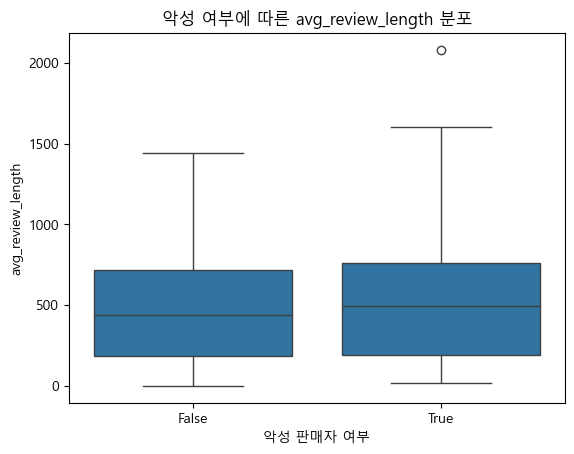

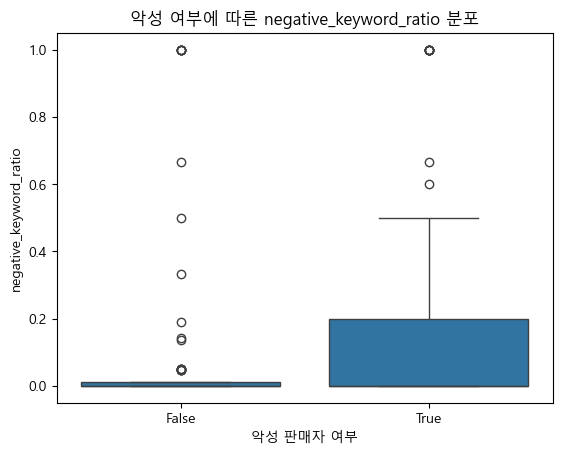

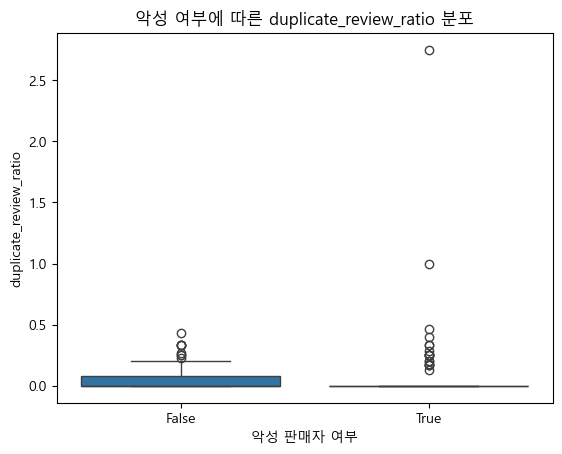

In [35]:
for col in text_cols:
    sns.boxplot(data=df, x="is_abusing_seller", y=col)
    plt.title(f"악성 여부에 따른 {col} 분포")
    plt.xlabel("악성 판매자 여부")
    plt.ylabel(col)
    plt.show()

❓ [6] 문의 Feature 분석

In [36]:
question_cols = [
    "refund_question_ratio",
    "authenticity_question_ratio",
    "defect_question_ratio",
    "delivery_question_ratio",
    "question_to_review_ratio"
]

df[question_cols].describe()

,refund_question_ratio,authenticity_question_ratio,defect_question_ratio,delivery_question_ratio,question_to_review_ratio
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.010282,0.041408,0.028887,0.149220,1.423701
std,0.034371,0.165098,0.088412,0.201833,1.432111
min,0.000000,0.000000,0.000000,0.000000,0.062500
25%,0.000000,0.000000,0.000000,0.000000,0.659420
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.250000,2.000000
max,0.230769,1.000000,0.500000,1.000000,8.500000


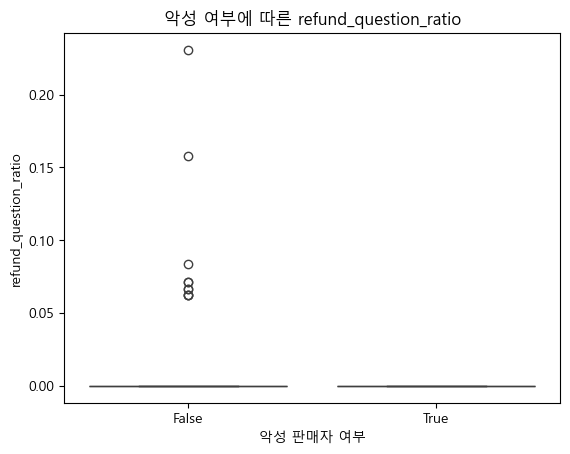

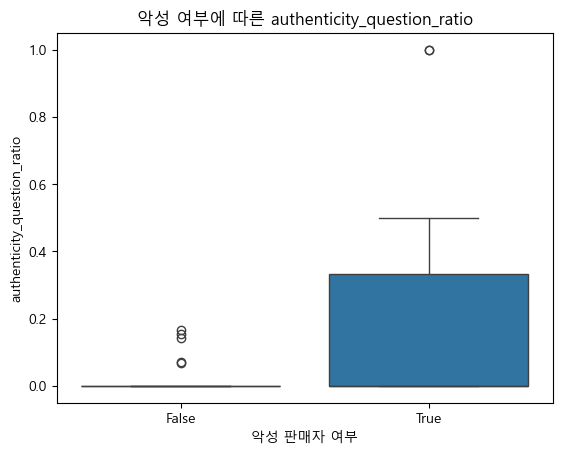

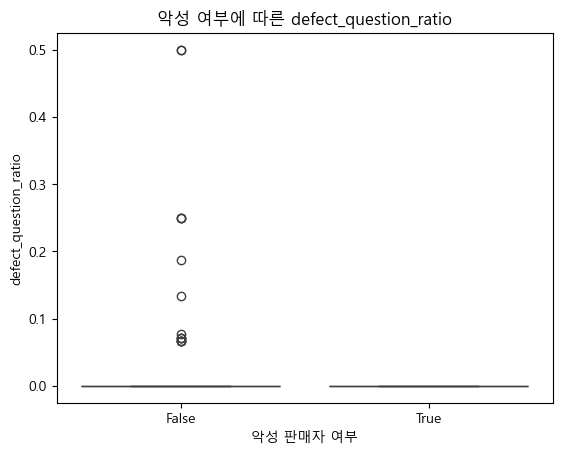

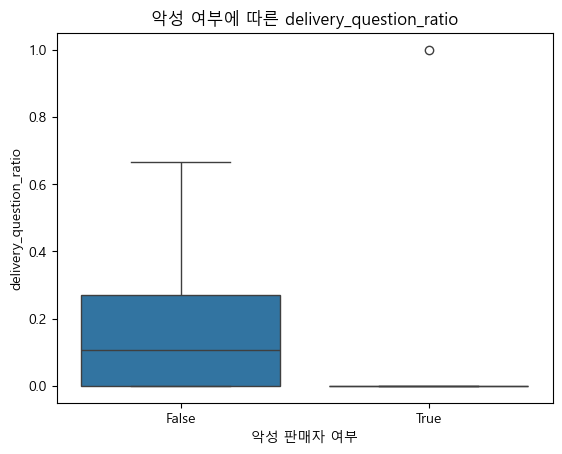

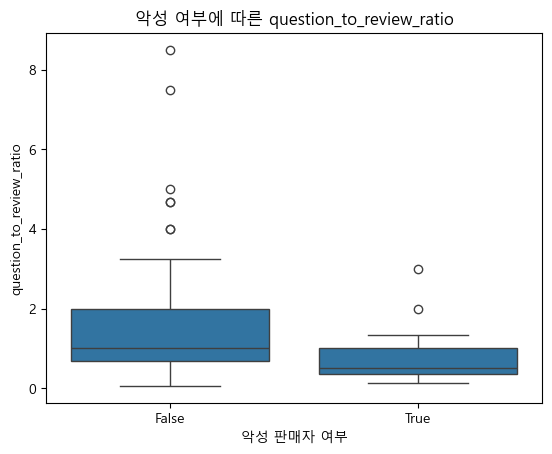

In [37]:
for col in question_cols:
    sns.boxplot(data=df, x="is_abusing_seller", y=col)
    plt.title(f"악성 여부에 따른 {col}")
    plt.xlabel("악성 판매자 여부")
    plt.ylabel(col)
    plt.show()

🔗 [7] 상관관계 히트맵

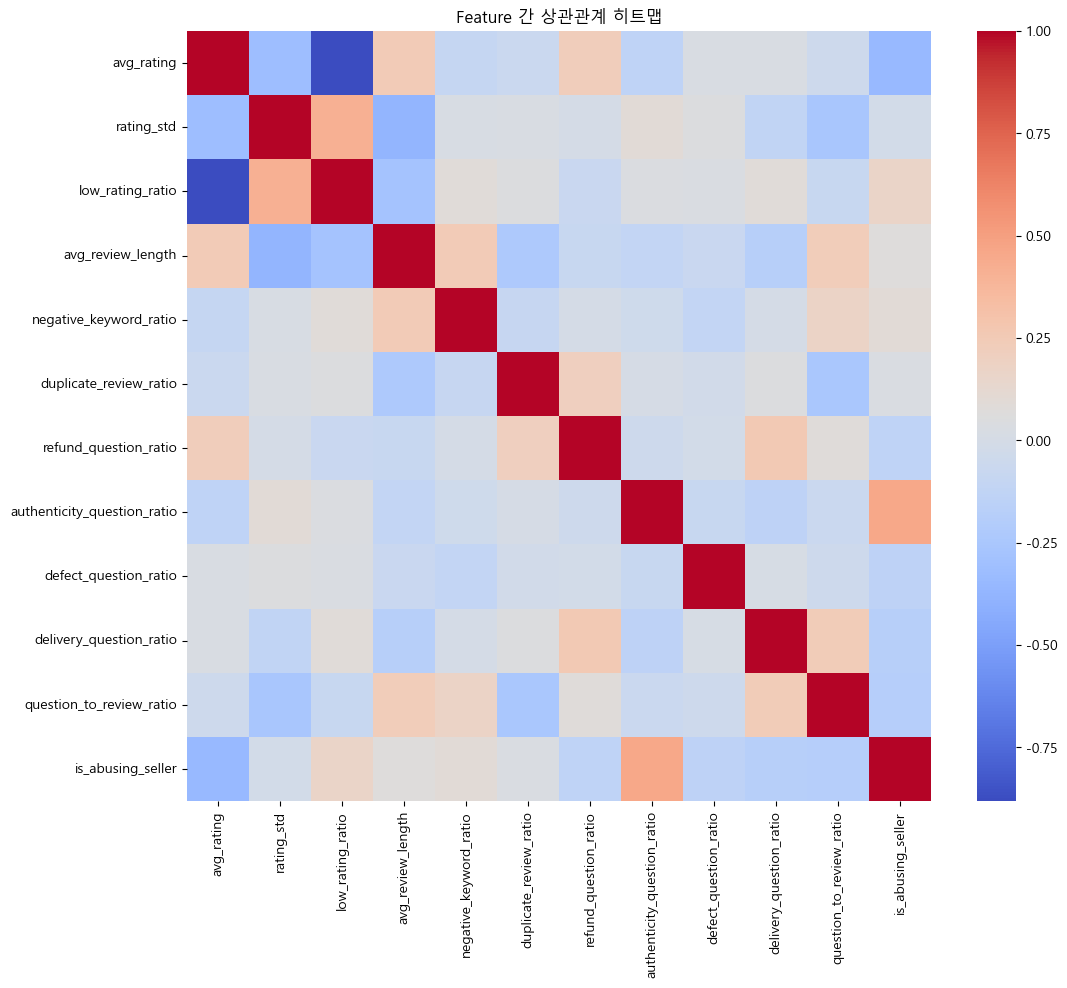

In [38]:
feature_cols = rating_cols + text_cols + question_cols

plt.figure(figsize=(12,10))
sns.heatmap(
    df[feature_cols + ["is_abusing_seller"]].corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Feature 간 상관관계 히트맵")
plt.show()

## 📊 EDA 결론 요약

1. 악성 판매자는 평균 평점이 더 낮은가?
2. 저평점 비율이 높은가?
3. 부정 키워드 비율이 유의미하게 높은가?
4. 환불/불량/정품 문의 비율이 높은가?
5. 리뷰 대비 문의 비율이 비정상적으로 높은가?
6. 가장 예측력이 높아 보이는 feature는 무엇인가?


## 🎯 이 EDA의 의미 (면접용 문장 예시)

본 프로젝트에서는 판매자 단위로 리뷰 및 문의 데이터를 집계하여
평점 분포, 부정 키워드 비율, 환불/불량 문의 비율과 같은 파생 변수를 생성하였고,
EDA를 통해 악성 판매자와 정상 판매자 간 통계적 차이를 시각적으로 확인하였다.